# Tercera ejercitación de Laboratorio de Datos (1er cuatrimestre 2021)


***Fecha de entrega de consigna: 21/5/2021 en horario de clase***

***Fecha de entrega de resolución: 1/6/2021 a las 23:55 PM***

***Que hay que hacer***: Más abajo hay una serie de consignas ("pasos") que gradualmente guían al objetivo de la ejercitación. Cada paso tiene además una ayuda. Hay que ir haciendo lo que pedimos en esos pasos hasta completar la ejercitación.

***Cómo hay que hacerlo***: Cada alumno tiene que crear y compartir un notebook individual con la resolución, el cual se llame "Ejercitacion 3" seguido de su nombre y apellido. En el campus virtual compartimos instrucciones para la entrega de ejercicios. El notebook tiene que contener código que al ejecutarse haga lo que pedimos, y texto comentando lo que ustedes consideren necesario para que nosotros entendamos lo que hicieron.

***Qué pasa después***: Nosotros evaluamos los notebooks de cada uno y los tenemos en cuenta para calcular la nota final. El día siguiente a la fecha límite de entrega, publicamos un notebook junto con nuestra resolución de la ejecitación para que puedan comparar con lo que ustedes hicieron.

***Qué hago si no me sale***: Consultarnos las dudas que tengan en el foro de la materia que se encuentra en el campus virtual.

***RECUERDEN QUE ES OBLIGATORIO ENTREGAR UN NOTEBOOK PARA CONTINUAR CON LA MATERIA***

---

# Consigna

El objetivo de este tercer TP es aplicar técnicas de reducción de la dimensión, para luego usar las dimensiones reducidas con el propósito de hacer un clustering de los datos en grupos. Finalmente, usar las etiquetas obtenidas de ese clustering para clasificar nuevos datos.

Por lo tanto, en la primera parte vamos a usar técnicas de **aprendizaje no supervisado** que nos van a permitir revelar estructura en los datos aún si no tenemos ningún tipo de etiqueta sobre los mismos. Luego, usamos esa información para entrenar un modelo de **aprendizaje supervisado** con el propósito de clasificar nuevos ejemplos. Este tipo de esquema es útil cuando tenemos que desarrollar un clasificador a partir de datos sobre los cuales no conocemos suficiente como para etiquetarlos.

---

En este TP vamos a necesitar el dataset "fashion-mnist" (https://github.com/zalandoresearch/fashion-mnist).

Recordemos que el dataset consta de 70000 imágenes de 28x28 píxeles en escala de grises divididas en 10 clases:

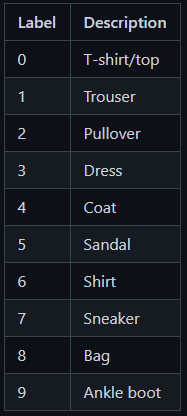

Podemos usar el siguiente código para cargar los datos:

In [ ]:
from keras.datasets import mnist,fashion_mnist

(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()  # cargo los dataset de entrenamiento y testeo

# reshapeamos para obtener un vector de 784 elementos (features) por cada imagen (samples)
X_train = X_train_raw.reshape(60000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones
X_test = X_test_raw.reshape(10000, -1) # no tocamos el numero de samples, 60000, pero reshapeamos las demas dimensiones

X_train = X_train.astype('float32') # transformamos el tipo de datos a "float32"
X_test = X_test.astype('float32') # transformamos el tipo de datos a "float32"

# normalizamos por el maximo valor que pueden tener los pixels para que los valores queden entre 0 y 1
X_train = X_train/255.0
X_test = X_test/255.0

# print the final input shape ready for training
print("Matriz de entrenamiento shape", X_train.shape)
print("Matriz de testeo shape", X_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
Matriz de entrenamiento shape (60000, 784)
Matriz de testeo shape (10000, 784)


Hecho esto, tenemos separados los datos en el conjunto de entrenamiento y evaluación con sus etiquetas correspondientes.

**Primer paso**: Hacer PCA sobre la matrix de datos de entrenamiento.

**Segundo paso**: Obtener y plotear la varianza explicada por cada componente y la varianza explicada acumulada vs. número de componentes.

**Tercer paso**: Visualizar las primeros cinco componentes en orden de varianza explicada

**Ayuda**: El vector correspondiente a la enésima componente principal está en...

```
pca.components_[n]
```
... y podemos visualizarla usando el comando de pyplot:


```
plt.imshow()
```
Pero antes tenemos que volver a transformarlo a las dimensiones de 28 por 28 de las imágenes originales.

**Cuarto paso**: Elegir algunas de las imágenes al azar y mostrar la reconstrucción obtenida usando 2, 10, 25, 50 y 100 componentes.

**Ayuda**: Este código se puede adaptar de la segunda parte del notebook de PCA que vimos en clase.

**Quinto paso**: Visualizar los datos en un espacio de dimensión reducida formado por la 1era vs. la 2da componentes principales, usando scatterplot.

**Sexto paso**: Hacer k-means con k=2 sobre los datos del espacio 2D formado por la primera y segunda componente principal. Visualizar algunos ejemplos correspondientes a cada uno de los clusters para entender a dónde fue a parar cada tipo de prenda en los clusters.

**Séptimo paso**: Usando los ids del clustering como etiquetas, entrenar un modelo KNN (K=5) usando los datos de entrenamiento (con todos los features, no solo las primeras dos componentes principales).

**Octavo paso**: Armar un nuevo vector de etiquetas que reemplace a y_test, y tenga 0 donde pensamos que ese ejemplo iría al cluster 0 y 1 donde pensamos que iría al cluster 1 (los clusters que obtuvimos con k-means).

**Ayuda**: Hacer esto por inspección visual. Típicamente deberían separarse las prendas de vestir tipo remeras, buzos, sweaters, camisas, zapatos en un cluster, y zapatos, zapatillas y bolsas en el otro cluster.

**Noveno paso**: Ahora aplicar el modelo KNN a datos del dataset de evaluación. Hacerlo con los primeros 1000 (sino puede tardar mucho). Usando las ids obtenidas mediante el procedimiento del paso anterior, y las predichas por KNN, construir una matriz de confusión para evaluar la performance del clasificador KNN.


